![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carga de la base de datos preparada desde la fase 2.

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("BBDD_hospitalizacion_codificado.csv")
df

,Edad,Diabetes,PSA,Biopsias_previas,Vol_prostatico,Antibiotico_profilaxis,Num_muestras,Enf_cronica_pulm_obstructiva,Biopsia,Fiebre,ITU,Hospitalizacion
0,53,0,4.0,0,1,0,12,0,0,1,0,1
1,56,0,7.7,0,1,0,12,0,0,1,0,1
2,57,0,29.0,1,1,0,24,0,0,1,0,1
3,56,0,7.0,0,1,0,12,0,0,1,0,1
4,55,0,29.0,1,1,0,24,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
426,55,0,5.0,0,0,0,12,0,2,0,0,0
427,70,1,18.0,0,1,0,12,0,0,0,0,0
428,75,0,75.0,0,1,0,12,0,5,0,0,0
429,67,0,6.0,0,1,0,12,0,1,0,0,0


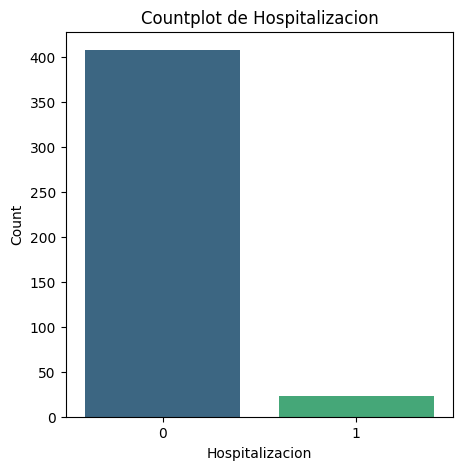

Hospitalizacion
0    408
1     23
Name: count, dtype: int64


In [3]:
plt.figure(figsize=(5,5))
sns.countplot(x="Hospitalizacion", data=df, palette="viridis")
plt.xlabel('Hospitalizacion')
plt.ylabel('Count')
plt.title('Countplot de Hospitalizacion')
plt.show()

print(df["Hospitalizacion"].value_counts())

La variable objetivo muestra un considerable desequilibrio entre las clases, con tan solo 23 registros pertenecientes a la clase positiva para la hospitalización.<br>
La idea es abordar el desequilibrio de clases durante el entrenamiento del modelo sin tocar el conjunto de prueba. La razón detrás de esto es asegurarse de que la evaluación del rendimiento del modelo en el conjunto de prueba sea una representación más realista de cómo se comportaría en datos no vistos.<br>
El proceso sería:
* Aplicar SMOTE solo al conjunto de entrenamiento, generando instancias sintéticas para equilibrar las clases.
* Entrenar el modelo con el conjunto de entrenamiento aumentado por SMOTE.
* Evaluar el rendimiento del modelo en el conjunto de prueba, que no ha sido modificado por SMOTE.

Separamos el dataset en X, y (variable objetivo)

In [4]:
X= df.drop("Hospitalizacion", axis=1)
y= df["Hospitalizacion"]

Separamos el dataset en el conjunto de entrenamiento y el conjunto test: X_train, X_test, y_train y y_test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=50, stratify=y)
print("Cantidad de instancias en el conjunto de entrenamiento son:", len(X_train))
print("Cantidad de instancias en el conjunto de prueba:", len(X_test))
y_train_no = y_train.value_counts()[0]
y_train_si = y_train.value_counts()[1]
y_test_no = y_test.value_counts()[0]
y_test_si = y_test.value_counts()[1]
print("Cantidad de etiquetas en el conjunto de entrenamiento que son NO:", y_train_no)
print("Cantidad de etiquetas en el conjunto de entrenamiento que son SI:", y_train_si)
print("Cantidad de etiquetas en el conjunto de entrenamiento que son NO:", y_test_no)
print("Cantidad de etiquetas en el conjunto de entrenamiento que son SI:", y_test_si)

Cantidad de instancias en el conjunto de entrenamiento son: 301
Cantidad de instancias en el conjunto de prueba: 130
Cantidad de etiquetas en el conjunto de entrenamiento que son NO: 285
Cantidad de etiquetas en el conjunto de entrenamiento que son SI: 16
Cantidad de etiquetas en el conjunto de entrenamiento que son NO: 123
Cantidad de etiquetas en el conjunto de entrenamiento que son SI: 7


Realizamos un sobremuestreo para poder compensar el desbalanceo de clases que posee el conjunto de datos

In [6]:
smote = SMOTE(random_state=50)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Cantidad de instancias en el conjunto de prueba:", len(X_train_smote))
y_train_smote_no = y_train_smote.value_counts()[0]
y_train_smote_si = y_train_smote.value_counts()[1]
print("Cantidad de etiquetas en el conjunto de entrenamiento que son NO:", y_train_smote_no)
print("Cantidad de etiquetas en el conjunto de entrenamiento que son SI:", y_train_smote_si)

Cantidad de instancias en el conjunto de prueba: 570
Cantidad de etiquetas en el conjunto de entrenamiento que son NO: 285
Cantidad de etiquetas en el conjunto de entrenamiento que son SI: 285


# Modelo de arbol de decision

In [7]:
prof_max_arbitraria = 8
model_tree = DecisionTreeClassifier(max_depth=prof_max_arbitraria)
model_tree.fit(X_train_smote,y_train_smote)
y_pred = model_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       123
           1       0.47      1.00      0.64         7

    accuracy                           0.94       130
   macro avg       0.73      0.97      0.80       130
weighted avg       0.97      0.94      0.95       130



Para evaluar el rendimiento del modelo de clasificacion realizaremos una matriz de confusion y un mapa de calor para visualizar este rendimiento

[[115   0]
 [  8   7]]


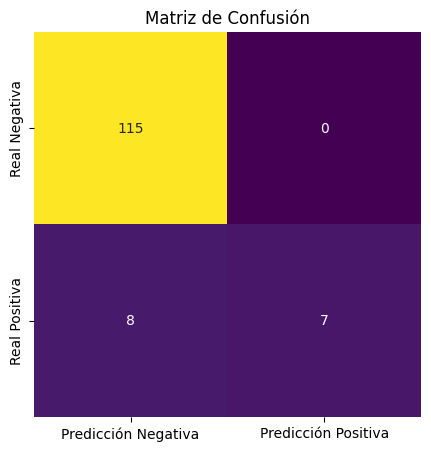

In [8]:
matriz_confusion = confusion_matrix(y_pred, y_test)
print(matriz_confusion)

plt.figure(figsize=(5,5))
sns.heatmap(matriz_confusion, annot=True,fmt="d", cmap="viridis", cbar=False,
            xticklabels=['Predicción Negativa', 'Predicción Positiva'],
            yticklabels=['Real Negativa', 'Real Positiva'])
plt.title('Matriz de Confusión')
plt.show()

Precision y Recall:

La precisión para la clase mayoritaria (etiqueta 0) es perfecta (1.00), indicando que todas las predicciones positivas para esta clase son correctas.
La precisión para la clase minoritaria (etiqueta 1) es más baja (0.41), lo que sugiere que hay falsos positivos en las predicciones para esta clase.
El recall es alto para ambas clases, especialmente para la clase minoritaria (1.00), lo que indica que el modelo es efectivo para capturar la mayoría de las instancias positivas reales.<br>
F1-Score:

El F1-Score, que equilibra precision y recall, es alto para la clase mayoritaria (0.96) pero más bajo para la clase minoritaria (0.58).
Esto sugiere que hay un compromiso entre la precisión y el recall en la clasificación de la clase minoritaria.<br>
Exactitud (Accuracy):

La exactitud general del modelo es del 92%, lo cual es un buen indicador general del rendimiento, pero debe interpretarse con precaución en conjuntos de datos desequilibrados.

### Visualizacion de la importancia de cada variable respecto a la variable objetivo

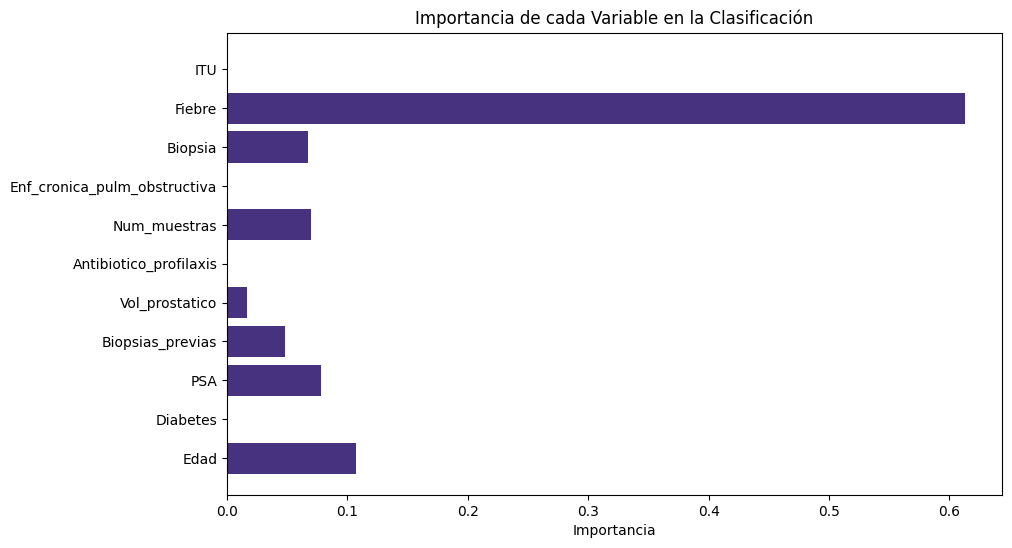

In [9]:
imp_variables = model_tree.feature_importances_
nombre_variables = list(X.columns)

plt.figure(figsize=(10, 6))
sns.set_palette('viridis')
plt.barh(nombre_variables, imp_variables)
plt.xlabel('Importancia')
plt.title('Importancia de cada Variable en la Clasificación')
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [10]:
modelo_arbol = DecisionTreeClassifier()
parametros_grid = {'max_depth': [3,4,5,6,7,8,9,10]}
grid_search = GridSearchCV(modelo_arbol, parametros_grid, cv=5, scoring="precision")
grid_search.fit(X_train_smote, y_train_smote)
mejor_max_depth = grid_search.best_params_['max_depth']
modelo_mejorado = DecisionTreeClassifier(max_depth=mejor_max_depth)
modelo_mejorado.fit(X_train_smote, y_train_smote)
y_pred_mejorado = modelo_mejorado.predict(X_test)
print(classification_report(y_test, y_pred_mejorado))
print(f"Mejor valor para max_depth: {mejor_max_depth}")

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       123
           1       0.35      1.00      0.52         7

    accuracy                           0.90       130
   macro avg       0.68      0.95      0.73       130
weighted avg       0.96      0.90      0.92       130

Mejor valor para max_depth: 9


* Modelo Sin Mejorar:

Tiene una alta precisión para los casos en los que el paciente no fue hospitalizado (clase 0), lo que significa que cuando predice que un paciente no será hospitalizado, es probable que sea correcto.
Logra una alta sensibilidad (recall) para los casos en los que el paciente fue hospitalizado (clase 1), lo que indica que identifica correctamente a la mayoría de los pacientes hospitalizados.<br>

* Modelo Mejorado:

Aunque la precisión para los casos en los que el paciente no fue hospitalizado (clase 0) sigue siendo alta, la precisión para los casos en los que el paciente fue hospitalizado (clase 1) disminuye. Sin embargo, esto se compensa con un aumento en el recall para la clase 1.
Tener un recall del 100% para la clase 1 significa que el modelo mejorado identifica correctamente a todos los pacientes que fueron hospitalizados.

# Modelo de n vecinos cercanos

In [12]:
n_neighbors_arbitraria = 5
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors_arbitraria)
model_knn.fit(X_train_smote,y_train_smote)
y_pred_knn = model_knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       123
           1       0.27      1.00      0.42         7

    accuracy                           0.85       130
   macro avg       0.63      0.92      0.67       130
weighted avg       0.96      0.85      0.89       130



[[104   0]
 [ 19   7]]


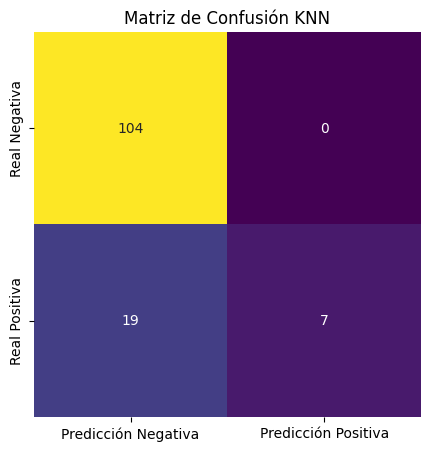

In [14]:
matriz_confusion2 = confusion_matrix(y_pred_knn, y_test)
print(matriz_confusion2)

plt.figure(figsize=(5,5))
sns.heatmap(matriz_confusion2, annot=True,fmt="d", cmap="viridis", cbar=False,
            xticklabels=['Predicción Negativa', 'Predicción Positiva'],
            yticklabels=['Real Negativa', 'Real Positiva'])
plt.title('Matriz de Confusión KNN')
plt.show()

Encuentre el valor óptimo para k

In [13]:
modelo_knn_2 = KNeighborsClassifier()
parametros_grid2 = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search2 = GridSearchCV(modelo_knn_2, parametros_grid2, cv=5, scoring='accuracy')
grid_search2.fit(X_train_smote, y_train_smote)
mejor_n_neighbors = grid_search2.best_params_['n_neighbors']
modelo_mejorado_knn = KNeighborsClassifier(n_neighbors=mejor_n_neighbors)
modelo_mejorado_knn.fit(X_train_smote, y_train_smote)
y_pred_mejorado_knn = modelo_mejorado_knn.predict(X_test)
print(classification_report(y_test, y_pred_mejorado_knn))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       123
           1       0.33      1.00      0.50         7

    accuracy                           0.89       130
   macro avg       0.67      0.94      0.72       130
weighted avg       0.96      0.89      0.92       130



[[109   0]
 [ 14   7]]


Text(0.5, 1.0, 'Matriz de Confusión KNN mejorado')

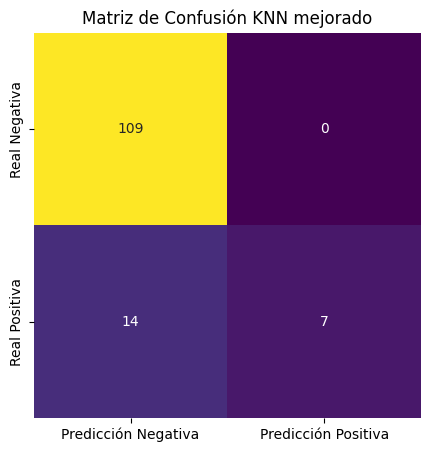

In [15]:
matriz_confusion3 = confusion_matrix(y_pred_mejorado_knn, y_test)
print(matriz_confusion3)

plt.figure(figsize=(5,5))
sns.heatmap(matriz_confusion3, annot=True,fmt="d", cmap="viridis", cbar=False,
            xticklabels=['Predicción Negativa', 'Predicción Positiva'],
            yticklabels=['Real Negativa', 'Real Positiva'])
plt.title('Matriz de Confusión KNN mejorado')

# Modelo SVC

In [17]:
modelo_svc = SVC()
modelo_svc.fit(X_train_smote, y_train_smote)
y_pred_svc = modelo_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.96      0.39      0.55       123
           1       0.06      0.71      0.11         7

    accuracy                           0.41       130
   macro avg       0.51      0.55      0.33       130
weighted avg       0.91      0.41      0.53       130



[[48  2]
 [75  5]]


Text(0.5, 1.0, 'Matriz de Confusión svc')

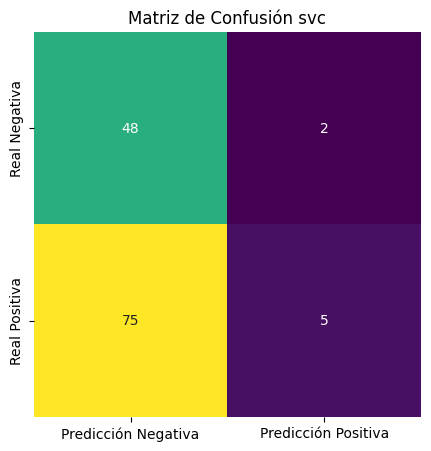

In [18]:
matriz_confusion4 = confusion_matrix(y_pred_svc, y_test)
print(matriz_confusion4)

plt.figure(figsize=(5,5))
sns.heatmap(matriz_confusion4, annot=True,fmt="d", cmap="viridis", cbar=False,
            xticklabels=['Predicción Negativa', 'Predicción Positiva'],
            yticklabels=['Real Negativa', 'Real Positiva'])
plt.title('Matriz de Confusión svc')

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

### Conclusiones Generales:
El árbol de decisión mejorado parece tener un rendimiento más equilibrado, con buenos resultados en términos de precisión y recall para la clase 1.
Los modelos k-NN, tanto sin mejorar como mejorado, tienen buenos resultados en recall para la clase 1, pero la precisión es baja, indicando la posibilidad de muchos falsos positivos.
El SVC tiene un rendimiento deficiente en términos de precisión y recall, siendo menos efectivo en la identificación de pacientes hospitalizados.

## Mejoras que se pueden realizar para mejorar el rendimiento de los modelos:
1. Re-muestreo del Conjunto de Datos: esto se realizo al principio del notebook haciendo un sobremuestreo de la clase minoritaria
2. Pesos de Clase: implica asignar pesos diferentes a las clases para tener en cuenta el desbalance
3. Ajuste de Hiperparámetros: implica realizar la busqueda de hiperparametros para encontrar la combinacion optima para el modelo
4. Ensemble Methods: utilizar modelos de ensamble, aunque puede tener un elevado costo computacional

## Modelo Arbol de Decision

Buscamos las mejores combinaciones de hiperparametros para obtener el mejor rendimiento

In [21]:
modelo_arbol5 = DecisionTreeClassifier(random_state=42)
parametros_grid_arbol = {'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'min_samples_leaf': [1, 2, 4]}

grid_search_arbol = GridSearchCV(modelo_arbol5, parametros_grid_arbol, cv=5, scoring='f1')

grid_search_arbol.fit(X_train, y_train)

mejor_modelo_arbol = grid_search_arbol.best_estimator_

print(f"La mejor combinacion de hiperparametros es: {mejor_modelo_arbol}")


La mejor combinacion de hiperparametros es: DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=42)


Entrenamos el modelo con los nuevos hiperparametros y evaluamos el rendimiento

In [22]:
mejor_modelo_arbol.fit(X_train, y_train)

y_pred_arbol = mejor_modelo_arbol.predict(X_test)

print("Árbol de Decisión Mejorado:")
print(classification_report(y_test, y_pred_arbol))
print(f"Exactitud: {accuracy_score(y_test, y_pred_arbol)}")

Árbol de Decisión Mejorado:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       123
           1       1.00      0.71      0.83         7

    accuracy                           0.98       130
   macro avg       0.99      0.86      0.91       130
weighted avg       0.98      0.98      0.98       130

Exactitud: 0.9846153846153847


[[123   2]
 [  0   5]]


Text(0.5, 1.0, 'Matriz de Confusión Arbol mejora de hiperparametros')

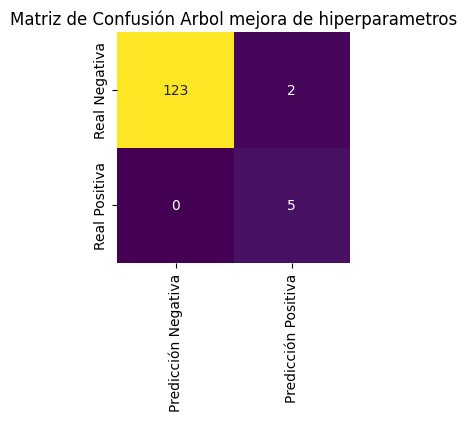

In [24]:
matriz_confusion5 = confusion_matrix(y_pred_arbol, y_test)
print(matriz_confusion5)

plt.figure(figsize=(3,3))
sns.heatmap(matriz_confusion5, annot=True,fmt="d", cmap="viridis", cbar=False,
            xticklabels=['Predicción Negativa', 'Predicción Positiva'],
            yticklabels=['Real Negativa', 'Real Positiva'])
plt.title('Matriz de Confusión Arbol mejora de hiperparametros')

## Modelo k-NN

Buscamos las mejores combinaciones de hiperparametros para obtener el mejor rendimiento

In [26]:
model_knn_2 = KNeighborsClassifier()
parametros_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],
                       'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(modelo_knn_2,parametros_grid_knn, cv= 5, scoring="f1")
grid_search_knn.fit(X_train, y_train)
mejor_modelo_knn = grid_search_knn.best_estimator_
print(f"La mejor combinacion de hiperparametros es: {mejor_modelo_knn}")


La mejor combinacion de hiperparametros es: KNeighborsClassifier(n_neighbors=7, weights='distance')


Entrenamos el modelo con los nuevos hiperparametros y evaluamos el rendimiento

In [28]:
mejor_modelo_knn.fit(X_train,y_train)
y_predict_knn_mejorado = mejor_modelo_knn.predict(X_test)
print("k-NN Mejorado:")
print(classification_report(y_test, y_predict_knn_mejorado))
print(f"Exactitud: {accuracy_score(y_test, y_predict_knn_mejorado)}")

k-NN Mejorado:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       123
           1       1.00      0.43      0.60         7

    accuracy                           0.97       130
   macro avg       0.98      0.71      0.79       130
weighted avg       0.97      0.97      0.96       130

Exactitud: 0.9692307692307692


[[123   4]
 [  0   3]]


Text(0.5, 1.0, 'Matriz de Confusión k-NN mejora de hiperparametros')

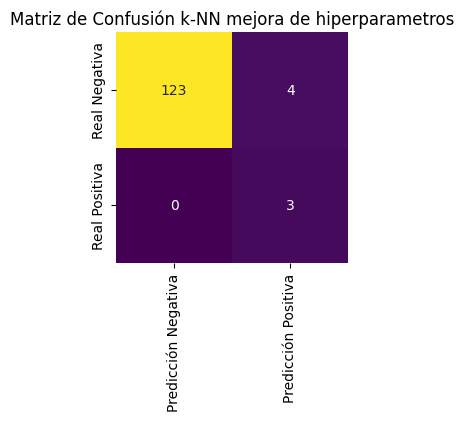

In [33]:
matriz_confusion6 = confusion_matrix(y_predict_knn_mejorado, y_test)
print(matriz_confusion6)

plt.figure(figsize=(3,3))
sns.heatmap(matriz_confusion6, annot=True,fmt="d", cmap="viridis", cbar=False,
            xticklabels=['Predicción Negativa', 'Predicción Positiva'],
            yticklabels=['Real Negativa', 'Real Positiva'])
plt.title('Matriz de Confusión k-NN mejora de hiperparametros')

## Modelo SVC

Buscamos las mejores combinaciones de hiperparametros para obtener el mejor rendimiento

In [30]:
modelo_svc_2 = SVC()
parametros_grid_svc_2 = {'C': [0.1, 1, 10, 100],
                       'kernel': ['linear', 'rbf'],
                       'class_weight': ['balanced']}
grid_search_svc_2 = GridSearchCV(modelo_svc, parametros_grid_svc_2, cv=5, scoring='f1')
grid_search_svc_2.fit(X_train, y_train)
mejor_modelo_svc_2 = grid_search_svc_2.best_estimator_
print(f"La mejor combinacion de hiperparametros es: {mejor_modelo_svc_2}")

La mejor combinacion de hiperparametros es: SVC(C=100, class_weight='balanced', kernel='linear')


Entrenamos el modelo con los nuevos hiperparametros y evaluamos el rendimiento

In [31]:
mejor_modelo_svc_2.fit(X_train, y_train)
y_pred_svc_2 = mejor_modelo_svc_2.predict(X_test)
print("SVC Mejorado:")
print(classification_report(y_test, y_pred_svc_2))
print(f"Exactitud: {accuracy_score(y_test, y_pred_svc_2)}")

SVC Mejorado:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       123
           1       0.47      1.00      0.64         7

    accuracy                           0.94       130
   macro avg       0.73      0.97      0.80       130
weighted avg       0.97      0.94      0.95       130

Exactitud: 0.9384615384615385


[[115   0]
 [  8   7]]


Text(0.5, 1.0, 'Matriz de Confusión SVC mejora de hiperparametros')

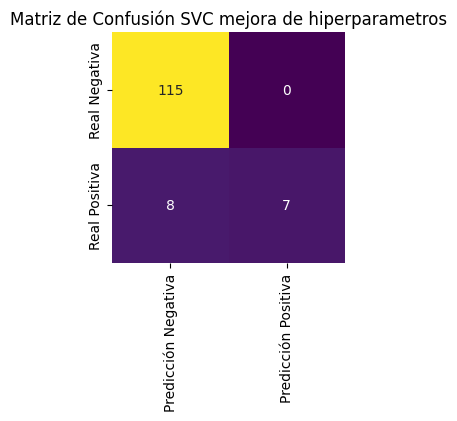

In [32]:
matriz_confusion7 = confusion_matrix(y_pred_svc_2, y_test)
print(matriz_confusion7)

plt.figure(figsize=(3,3))
sns.heatmap(matriz_confusion7, annot=True,fmt="d", cmap="viridis", cbar=False,
            xticklabels=['Predicción Negativa', 'Predicción Positiva'],
            yticklabels=['Real Negativa', 'Real Positiva'])
plt.title('Matriz de Confusión SVC mejora de hiperparametros')

# Conclusiones finales:
En términos de exactitud, los modelos mejorados en general superan a los modelos anteriores.

El k-NN Mejorado tiene una precisión y exactitud ligeramente mejoradas en comparación con el k-NN con sobremuestreo, pero el recall para la clase 1 disminuyó.

El SVC Mejorado muestra una mejora sustancial en la exactitud y una mejora en el recall para la clase 1 en comparación con el SVC con sobremuestreo.

Considerando nuestro objetivo de valorar la identificación correcta de casos positivos, el modelo de Árbol de Decisiones Mejorado se presenta como una elección efectiva. Su buen valor de F1-score, especialmente diseñado para conjuntos de datos desbalanceados, proporciona una medida sólida del rendimiento general del modelo en ambas clases. Es importante tener en cuenta que la elección del modelo puede depender de varios factores, como la interpretabilidad y otros requisitos específicos de la aplicación. Sin embargo, en términos de maximizar la identificación correcta de casos positivos en nuestro conjunto de datos desbalanceado, el Árbol de Decisiones Mejorado parece cumplir con nuestras expectativas. 